# <span style="color:green"> ANÁLISIS DE SENTIMIENTO CON SPOTIFY


![](https://static.vecteezy.com/system/resources/previews/022/101/104/original/spotify-logo-transparent-free-png.png)


In [9]:
import spotipy
import requests
import pylast
import spotipy.util as util
import matplotlib.pyplot as plt

## <span style="color:brown"> AGREGAMOS LOS DATOS DEL APY

In [2]:
username1 = 'Luis Diaz'
scope = 'playlist-modify-public'  # Define el alcance de acceso necesario
client_id = 'e609138354904cda84e45b105b839630'
client_secret = '1986a5db5a4b4da2869f160df2a4f2fc'
redirect_uri = 'https://open.spotify.com/artist/7oPftvlwr6VrsViSDV7fJY'


## <span style="color:brown"> CREAMOS UNA FUNCIÓN PARA LA CREACIÓN DEL TOKEN

In [3]:
# creando un token de manera automatica
import requests #importamos los paquetes 
import base64   #Este paquete nos ayuda a codigicar 
def obtener_token(client_id,client_secret): #creamos una función, con los parámetros lient_id y client_secret
    encoded=base64.b64encode(bytes(client_id+":"+client_secret,'utf-8')) #encodificamos
    params={'grant_type':'client_credentials'} #creamos los parámetros del apy
    header={'Authorization':'Basic '+str(encoded,'utf-8')} #creamos el header del apy
    r=requests.post('https://accounts.spotify.com/api/token',headers=header,data=params)
    if r.status_code!=200:
        print('error en el request',r.json())
        return None
    print('token valido por {} segundos'.format(r.json()['expires_in']))
    return r.json()['access_token']

In [4]:
token=obtener_token(client_id,client_secret)
print(token)

token valido por 3600 segundos
BQBnVf6_yMWs3oAjNz7jum77nsWKYmh-f9RkvCV9swtGCDK6HKyg5MihdpVw4r4k36KX1GeWhhbNs08URsQbActMJxHFka_IyFa7E5pEiOo3eZ6jw3c


In [5]:
spotify = spotipy.Spotify(auth=token)

## <span style="color:brown"> HACEMOS UNA FUNCIÓN PARA QUE NOS BRINDE LAS VALENCIAS DE LAS CANCIÓNES INGRESADAS, DE UNA MANERA AUTOMATIZADA

In [7]:
def Creator(nombre_canción, artista): #creamos una función
    results = spotify.search(q=f'track:{nombre_canción} artist:{artista}', type='track', limit=1) 
           #automatizamos los inputs,para que se ingrese como se pide en la documentación                                                                                    
    if results['tracks']['items']:    #hacemos una condicional para ver si los datos ingresados existen 
        track_id = results['tracks']['items'][0]['id']
        audio_features = spotify.audio_features(track_id)  
        
        if audio_features:
            valencia = audio_features[0]['valence']
            #print(f'La valencia de la canción "{nombre_cancion}" es: {valencia}')
        else:
            print('No se encontraron características de audio para la canción.')
    else:
        print('No se encontró la canción en Spotify.')
    return valencia

In [8]:
Creator('Us and Them', 'Pink floyd')

0.135

## <span style="color:brown"> HACEMOS UN INPUT AUTOMATIZADO PARA QUE NOS BRINDE LA VALENCIA

In [10]:
n = int(input("Ingrese el número de canciones a analizar: "))
i = 0
p = []
v= []
resultados=[]
while i < n:
    nombre_cancion = input(f"Ingrese la {i+1} canción: ")
    artista = input(f"Ingrese la {i+1} banda: ")
    p.append([nombre_cancion,artista])
    i = i + 1
for i in p:
    nombre_cancion = i[0]
    artista = i[1]
    valencia = Creator(nombre_cancion, artista)
    resultados.append(valencia)
print(resultados)
        

[0.135, 0.785]


## <span style="color:brown"> HACEMOS UN ANÁLISIS DE SENTIMIENTO MEDIANTE UNA GRÁFICA

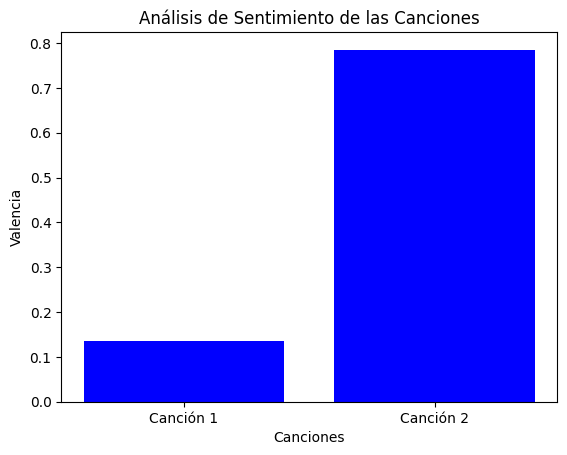

In [12]:
canciones = ['Canción 1', 'Canción 2']
valencias = resultados

# Configurar el gráfico
plt.bar(canciones, valencias, color='blue')

# Agregar etiquetas y título
plt.xlabel('Canciones')
plt.ylabel('Valencia')
plt.title('Análisis de Sentimiento de las Canciones')

# Mostrar el gráfico
plt.show()